In [1]:
import numpy as np
import pandas as pd

import sys
sys.path.insert(0, '..')

from match.make_match_panel import make_match_panel
from match.make_summary_match_panel import make_summary_match_panel
from match.support.support.df import simulate_df
from match.support.support.s import simulate_s

%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
n = 10

In [3]:
target = simulate_s(n, index_prefix='Sample ')

target

Sample 0    0.442682
Sample 1    0.749222
Sample 2    0.051006
Sample 3    0.634408
Sample 4    0.909032
Sample 5    0.352695
Sample 6    0.567868
Sample 7    0.875015
Sample 8    0.229172
Sample 9    0.510464
Name: Simulated Series, dtype: float64

In [4]:
features_continuous = simulate_df(
    n * 1, n, index_prefix='Feature ', column_prefix='Sample ')

features_continuous

,Sample 0,Sample 1,Sample 2,Sample 3,Sample 4,Sample 5,Sample 6,Sample 7,Sample 8,Sample 9
Feature 0,0.922164,0.464097,0.855227,0.898472,0.618194,0.093352,0.907121,0.321583,0.169533,0.578381
Feature 1,0.953586,0.715589,0.014457,0.089662,0.639463,0.625572,0.192277,0.698197,0.379049,0.379275
Feature 2,0.891125,0.407585,0.277782,0.467130,0.945422,0.085284,0.746092,0.675046,0.777928,0.561504
Feature 3,0.171243,0.542618,0.595863,0.153538,0.851946,0.352567,0.402755,0.167939,0.559820,0.414977
Feature 4,0.363430,0.995378,0.107707,0.467124,0.532803,0.835593,0.753943,0.772864,0.615052,0.688808
Feature 5,0.577446,0.773502,0.445953,0.946373,0.407069,0.742295,0.450011,0.208257,0.037522,0.455391
Feature 6,0.647868,0.743823,0.252477,0.332540,0.765268,0.569636,0.091772,0.544305,0.512960,0.239130
Feature 7,0.308412,0.822280,0.452723,0.100382,0.349070,0.951959,0.866119,0.662686,0.897358,0.997921
Feature 8,0.319614,0.629933,0.065165,0.658978,0.690560,0.180443,0.893014,0.684018,0.573306,0.433403
Feature 9,0.304091,0.098740,0.169503,0.565028,0.048926,0.094033,0.491641,0.009640,0.499037,0.053789


Matching using 1 process ...
Computing scores[i] = function(target, features[i]) ...
Computing 0.95 CI ...
	with 3 bootstrapped distributions ...
Computing p-value and FDR ...
	by scoring against 3 permuted targets ...


/home/k/Jumis/tools/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


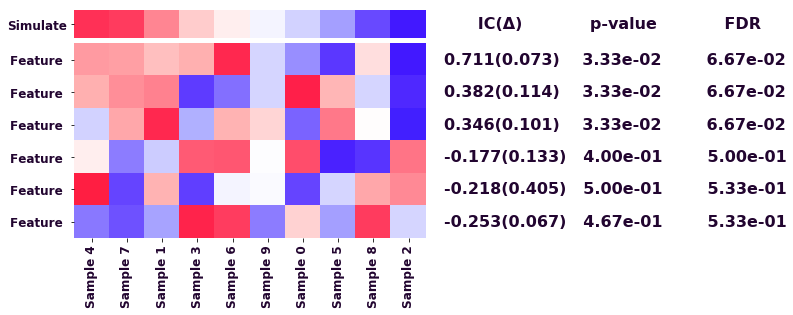

In [5]:
match_scores_for_continuous = make_match_panel(
    target,
    features_continuous,
    n_features=3,
    n_samplings=3,
    n_permutations=3,
    plot_sample_names=True)

In [6]:
target_str = pd.Series(
    ['T0'] * (n // 2) + ['T1'] * (n // 2), index=target.index)

target_str

Sample 0    T0
Sample 1    T0
Sample 2    T0
Sample 3    T0
Sample 4    T0
Sample 5    T1
Sample 6    T1
Sample 7    T1
Sample 8    T1
Sample 9    T1
dtype: object

Matching using 1 process ...
Computing scores[i] = function(target, features[i]) ...
Computing 0.95 CI ...
	with 3 bootstrapped distributions ...
Computing p-value and FDR ...
	by scoring against 3 permuted targets ...


/home/k/Jumis/tools/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


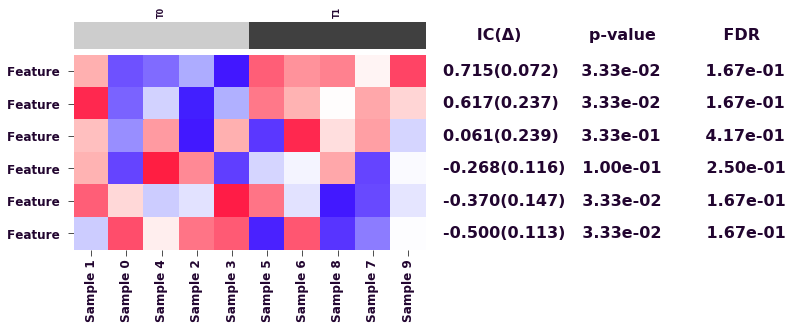

In [7]:
from matplotlib.colors import ListedColormap

match_scores_for_continuous = make_match_panel(
    target_str,
    features_continuous,
    n_features=3,
    n_samplings=3,
    n_permutations=3,
    target_type='binary',
    plot_sample_names=True)

In [8]:
features_categorical = simulate_df(
    n * 2, n, 8, index_prefix='Feature ', column_prefix='Sample ')

features_categorical

,Sample 0,Sample 1,Sample 2,Sample 3,Sample 4,Sample 5,Sample 6,Sample 7,Sample 8,Sample 9
Feature 0,0,4,1,1,5,1,0,2,0,6
Feature 1,2,3,4,3,7,4,3,2,7,2
Feature 2,0,0,2,0,0,0,1,7,3,4
Feature 3,7,2,6,0,2,1,1,3,4,7
Feature 4,2,1,0,4,4,1,7,5,4,6
Feature 5,6,6,7,6,2,1,2,3,1,2
Feature 6,4,4,2,3,0,1,7,7,3,7
Feature 7,6,5,0,3,1,6,7,4,2,6
Feature 8,3,2,5,0,4,0,4,3,3,7
Feature 9,0,3,3,7,1,5,6,4,7,4


Matching using 1 process ...
Computing scores[i] = function(target, features[i]) ...
Computing 0.95 CI ...
	with 3 bootstrapped distributions ...
Computing p-value and FDR ...
	by scoring against 3 permuted targets ...


/home/k/Jumis/tools/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


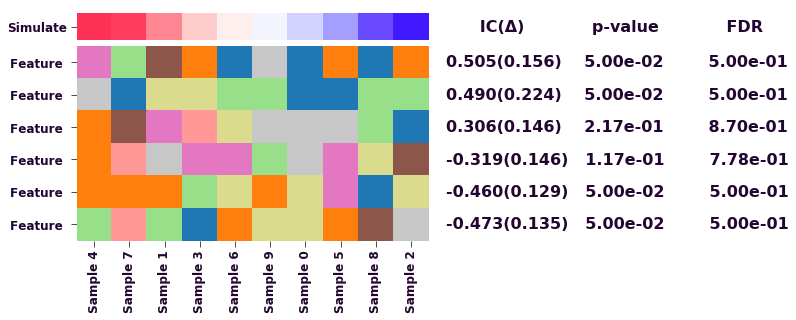

In [9]:
match_scores_for_categorical = make_match_panel(
    target,
    features_categorical,
    n_features=3,
    n_samplings=3,
    n_permutations=3,
    features_type='categorical',
    plot_sample_names=True)

In [10]:
features_binary = simulate_df(
    n * 3, n, 2, index_prefix='Feature ', column_prefix='Sample ')

features_binary

,Sample 0,Sample 1,Sample 2,Sample 3,Sample 4,Sample 5,Sample 6,Sample 7,Sample 8,Sample 9
Feature 0,0,0,1,1,1,1,0,0,0,0
Feature 1,0,1,0,1,1,0,1,0,1,0
Feature 2,0,0,0,0,0,0,1,1,1,0
Feature 3,1,0,0,0,0,1,1,1,0,1
Feature 4,0,1,0,0,0,1,1,1,0,0
Feature 5,0,0,1,0,0,1,0,1,1,0
Feature 6,0,0,0,1,0,1,1,1,1,1
Feature 7,0,1,0,1,1,0,1,0,0,0
Feature 8,1,0,1,0,0,0,0,1,1,1
Feature 9,0,1,1,1,1,1,0,0,1,0


Matching using 1 process ...
Computing scores[i] = function(target, features[i]) ...
Computing 0.95 CI ...
	with 3 bootstrapped distributions ...
Computing p-value and FDR ...
	by scoring against 3 permuted targets ...


/home/k/Jumis/tools/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


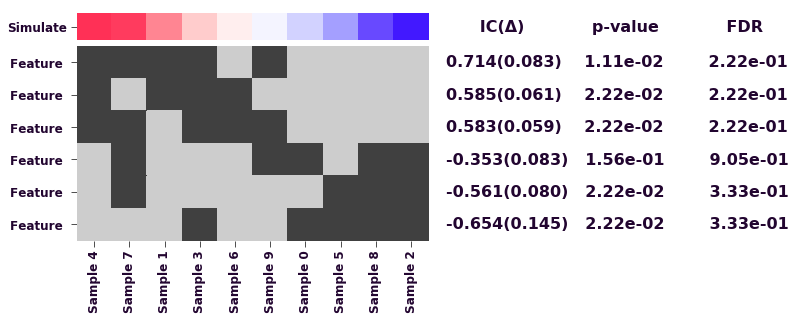

In [11]:
match_scores_for_binary = make_match_panel(
    target,
    features_binary,
    n_features=3,
    n_samplings=3,
    n_permutations=3,
    features_type='binary',
    plot_sample_names=True)

In [23]:
features_with_missing = simulate_df(
    n * 3, n, index_prefix='Feature ', column_prefix='Sample ')

features_with_missing.loc[
    np.random.choice(features_with_missing.index, size=n // 3),
    np.random.choice(features_with_missing.columns, size=n // 3)] = None

features_with_missing

,Sample 0,Sample 1,Sample 2,Sample 3,Sample 4,Sample 5,Sample 6,Sample 7,Sample 8,Sample 9
Feature 0,0.579420,0.066980,0.235336,0.766074,0.621077,0.169039,0.815097,0.936353,0.394715,0.233198
Feature 1,0.918461,0.194759,0.401054,0.116756,0.618569,0.710992,0.696789,0.750794,0.250568,0.439980
Feature 2,0.220060,0.046613,0.671223,0.344324,0.688568,0.851319,0.121022,0.629867,0.884704,0.209427
Feature 3,0.007346,0.492027,0.285702,0.106899,0.654839,0.678929,0.789486,0.557314,0.042536,0.981322
Feature 4,NaN,0.875757,NaN,0.330863,0.041251,0.530389,NaN,0.686717,0.545498,0.523430
Feature 5,0.629210,0.458968,0.296652,0.141845,0.554383,0.050905,0.299236,0.835388,0.419538,0.636123
Feature 6,0.526313,0.516716,0.996555,0.355719,0.190566,0.975007,0.359185,0.020163,0.946067,0.783634
Feature 7,0.581737,0.597941,0.073028,0.432871,0.671998,0.729595,0.135170,0.102117,0.965596,0.355404
Feature 8,0.799662,0.641594,0.115568,0.225540,0.649716,0.971486,0.069711,0.156074,0.632816,0.347550
Feature 9,0.917177,0.727156,0.366052,0.763432,0.625730,0.769706,0.132079,0.137467,0.843789,0.643966


In [25]:
from match.information.information.information import compute_information_coefficient

In [43]:
compute_information_coefficient(np.array([0,0,0]), np.array([0,0,0]))

0.48433856534703246

Matching using 1 process ...
Computing scores[i] = function(target, features[i]) ...
Computing 0.95 CI ...
	with 3 bootstrapped distributions ...
Computing p-value and FDR ...
	by scoring against 3 permuted targets ...


/home/k/Jumis/tools/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


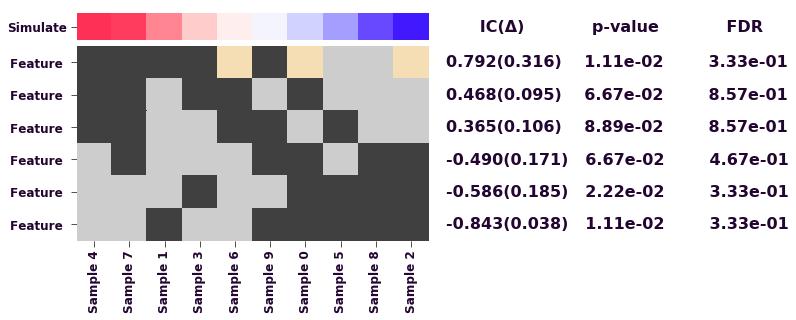

In [24]:
match_scores_for_binary = make_match_panel(
    target,
    features_with_missing,
    n_features=3,
    n_samplings=3,
    n_permutations=3,
    features_type='binary',
    plot_sample_names=True)

In [12]:
features = [
    [
        'Continuous features',
        features_continuous,
        ['Feature {}'.format(i) for i in range(n)],
        ['Alias {}'.format(i) for i in range(n)],
        None,  #match_scores_for_continuous,
        False,
        'continuous',
    ],
    [
        'Categorical features',
        features_categorical,
        ['Feature {}'.format(i) for i in range(n)],
        ['Alias {}'.format(i) for i in range(n)],
        None,  #match_scores_for_categorical,
        False,
        'categorical',
    ],
    [
        'Binary features',
        features_binary,
        ['Feature {}'.format(i) for i in range(n)],
        ['Alias {}'.format(i) for i in range(n)],
        None,  #match_scores_for_binary,
        False,
        'binary',
    ],
    [
        'Cntinuous features (scores ascending)',
        features_continuous.iloc[:, :-1],
        ['Feature {}'.format(i) for i in range(n)],
        ['Alias {}'.format(i) for i in range(n)],
        None,  #match_scores_for_continuous,
        True,
        'continuous',
    ],
]

Matching using 1 process ...
Computing scores[i] = function(target, features[i]) ...
Computing 0.95 CI ...
	with 30 bootstrapped distributions ...
Computing p-value and FDR ...
	by scoring against 30 permuted targets ...
Matching using 1 process ...
Computing scores[i] = function(target, features[i]) ...


/home/k/Jumis/tools/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


Computing 0.95 CI ...
	with 30 bootstrapped distributions ...
Computing p-value and FDR ...
	by scoring against 30 permuted targets ...
Matching using 1 process ...
Computing scores[i] = function(target, features[i]) ...
Computing 0.95 CI ...
	with 30 bootstrapped distributions ...
Computing p-value and FDR ...
	by scoring against 30 permuted targets ...
Matching using 1 process ...
Computing scores[i] = function(target, features[i]) ...
Computing 0.95 CI ...
	with 30 bootstrapped distributions ...
Computing p-value and FDR ...
	by scoring against 30 permuted targets ...


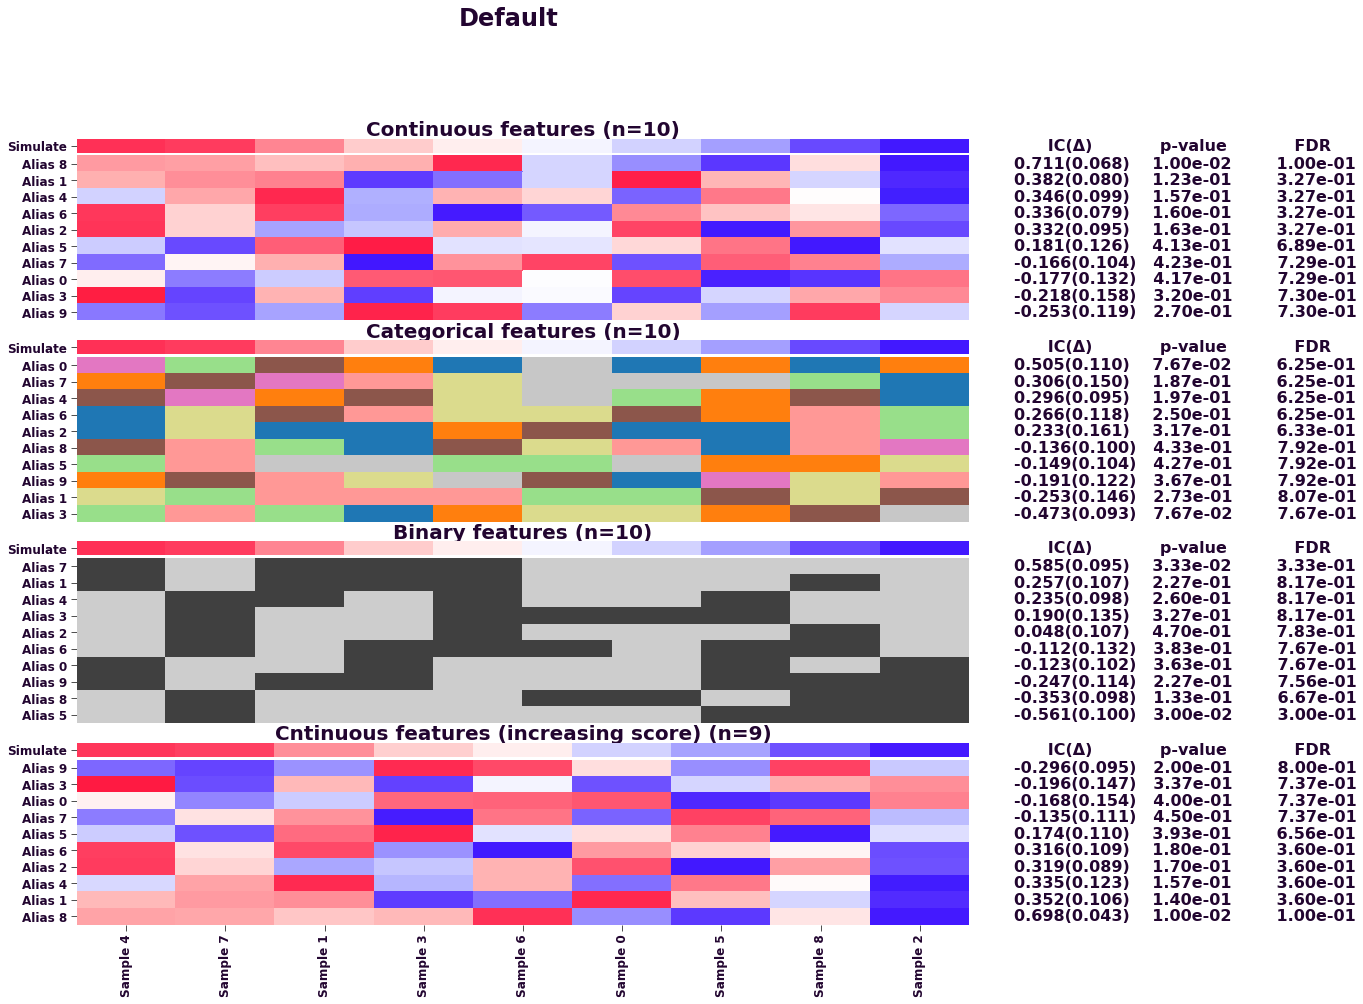

In [13]:
make_summary_match_panel(
    target, features, title='Default', plot_sample_names=True)

Matching using 1 process ...
Computing scores[i] = function(target, features[i]) ...
Computing 0.95 CI ...
	with 30 bootstrapped distributions ...
Computing p-value and FDR ...
	by scoring against 30 permuted targets ...
Matching using 1 process ...
Computing scores[i] = function(target, features[i]) ...


/home/k/Jumis/tools/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


Computing 0.95 CI ...
	with 30 bootstrapped distributions ...
Computing p-value and FDR ...
	by scoring against 30 permuted targets ...
Matching using 1 process ...
Computing scores[i] = function(target, features[i]) ...
Computing 0.95 CI ...
	with 30 bootstrapped distributions ...
Computing p-value and FDR ...
	by scoring against 30 permuted targets ...
Matching using 1 process ...
Computing scores[i] = function(target, features[i]) ...
Computing 0.95 CI ...
	with 30 bootstrapped distributions ...
Computing p-value and FDR ...
	by scoring against 30 permuted targets ...


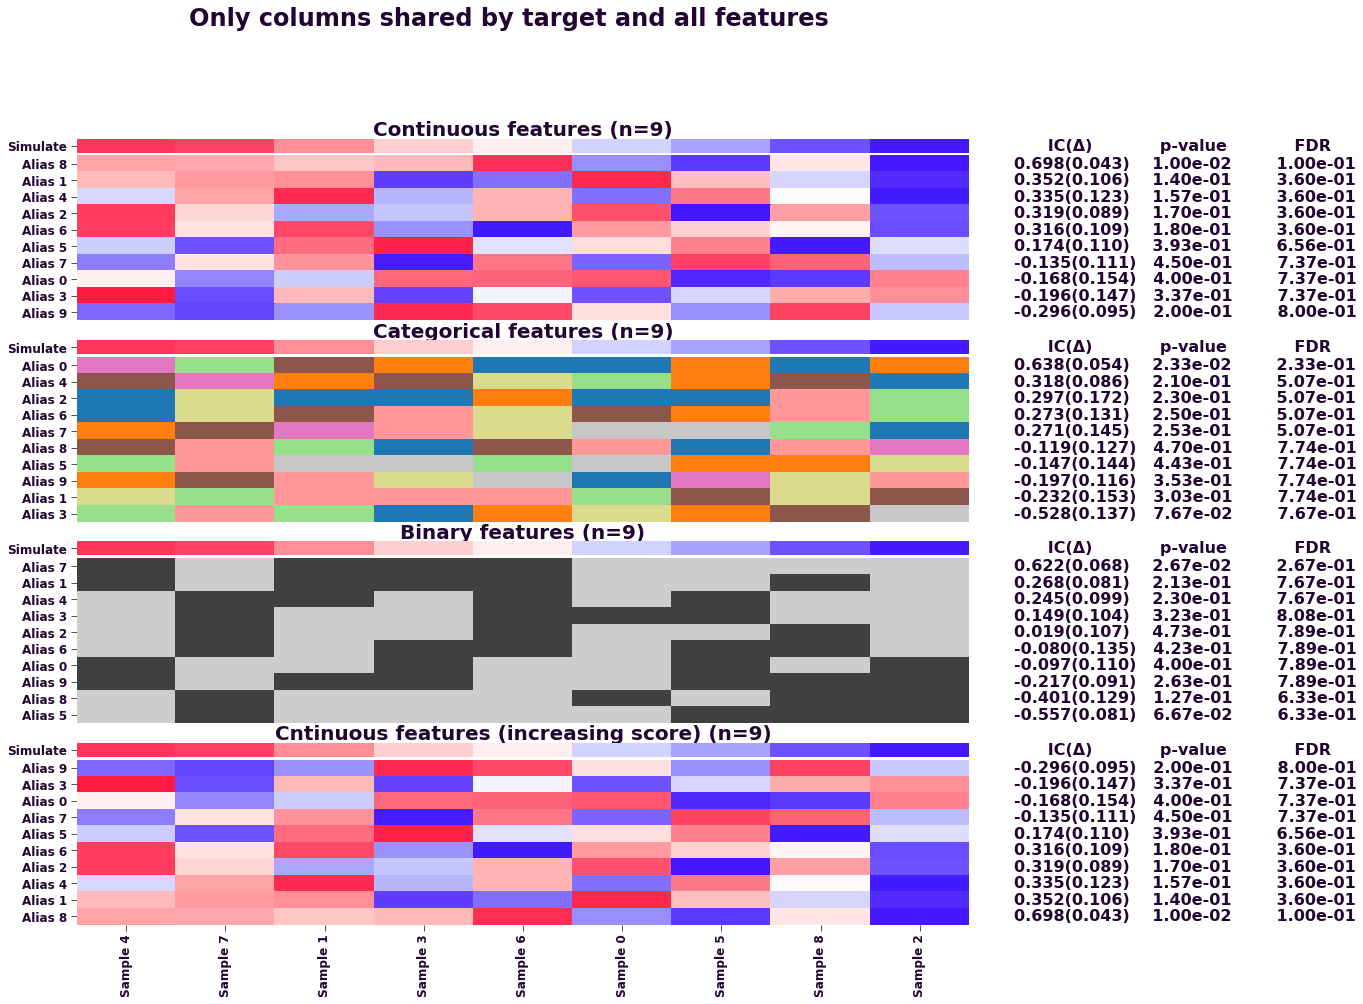

In [14]:
make_summary_match_panel(
    target,
    features,
    plot_only_columns_shared_by_target_and_all_features=True,
    title='Only columns shared by target and all features',
    plot_sample_names=True)